In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import pandas_datareader.data as web

In [2]:
plt.style.use(style="seaborn")

In [3]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()

In [4]:
df = web.DataReader("TSLA", 'yahoo', start, end)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-01-02 to 2020-12-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       249 non-null    float64
 1   Low        249 non-null    float64
 2   Open       249 non-null    float64
 3   Close      249 non-null    float64
 4   Volume     249 non-null    float64
 5   Adj Close  249 non-null    float64
dtypes: float64(6)
memory usage: 13.6 KB


In [6]:
df.reset_index(inplace=True)

In [7]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [8]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
1,2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2,2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
3,2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
4,2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [9]:
df.set_index('Date', inplace=True)

In [10]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [11]:
df1 = df['Close']

In [12]:
df2 = df[['Close']]

In [13]:
type(df1)

pandas.core.series.Series

In [14]:
type(df2)

pandas.core.frame.DataFrame

In [15]:
df2.describe()

,Close
count,249.000000
mean,283.667825
std,162.702299
min,72.244003
25%,149.613998
50%,215.962006
75%,420.279999
max,695.000000


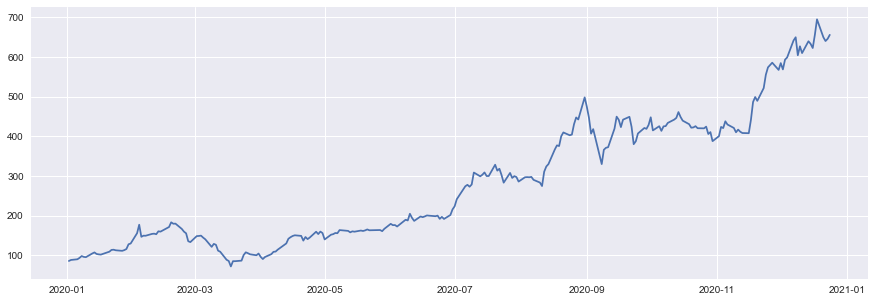

In [16]:
plt.figure(1, figsize=(15, 5))
plt.plot(df.Close)
plt.show()

In [17]:
df2["returns"] = df.Close.pct_change()

In [18]:
df2.head()

,Close,returns
Date,,
2020-01-02,86.052002,NaN
2020-01-03,88.601997,0.029633
2020-01-06,90.307999,0.019255
2020-01-07,93.811996,0.038801
2020-01-08,98.428001,0.049205


In [19]:
df2.dropna(inplace=True)

In [20]:
df2['log_returns'] = np.log(1 + df2['returns'])

In [21]:
df2.head()

,Close,returns,log_returns
Date,,,
2020-01-03,88.601997,0.029633,0.029203
2020-01-06,90.307999,0.019255,0.019072
2020-01-07,93.811996,0.038801,0.038067
2020-01-08,98.428001,0.049205,0.048033
2020-01-09,96.267998,-0.021945,-0.022189


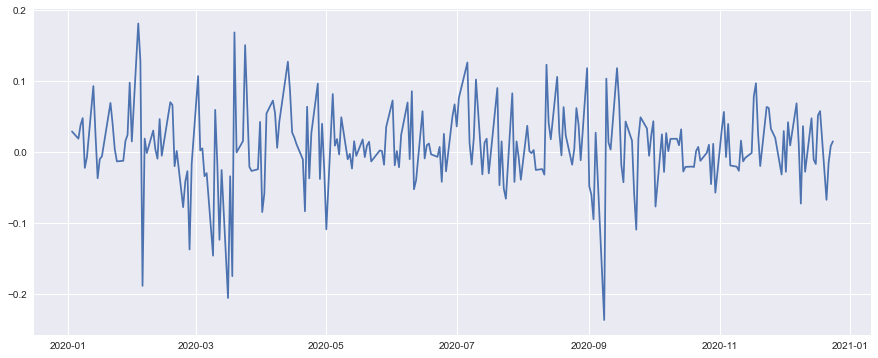

In [22]:
plt.figure(1, figsize=(15, 6))
plt.plot(df2['log_returns'])
plt.show()

In [23]:
X = df2[["Close", "log_returns"]].values

In [24]:
X[:10]

array([[ 8.86019974e+01,  2.92026137e-02],
       [ 9.03079987e+01,  1.90716341e-02],
       [ 9.38119965e+01,  3.80667067e-02],
       [ 9.84280014e+01,  4.80325888e-02],
       [ 9.62679977e+01, -2.21893855e-02],
       [ 9.56299973e+01, -6.64939557e-03],
       [ 1.04972000e+02,  9.32070995e-02],
       [ 1.07584000e+02,  2.45782853e-02],
       [ 1.03699997e+02, -3.67698486e-02],
       [ 1.02697998e+02, -9.70946228e-03]])

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)

In [27]:
X_scaled[:5]

array([[0.0262671 , 0.63575141],
       [0.02900654, 0.61151246],
       [0.03463314, 0.65695925],
       [0.04204536, 0.68080319],
       [0.0385769 , 0.51279314]])

In [28]:
y = X_scaled[:,0]

In [30]:
split = int(len(X_scaled) * 0.8)
x_train = X_scaled[:split]
x_test = X_scaled[split:]
y_train = y[:split]
y_test = y[split:]

In [31]:
assert len(x_train) == len(y_train)
assert len(x_test) == len(y_test)

In [62]:
len(x_train)

198

### Labeling

In [33]:
n = 3
Xtrain = []
ytrain = []
Xtest = []
ytest = []
for i in range(n, len(x_train)):
    Xtrain.append(x_train[i - n: i, : x_train.shape[1]])
    ytrain.append(y_train[i])

for i in range(n, len(x_test)):
    Xtest.append(x_test[i - n: i, : x_test.shape[1]])
    ytest.append(y_test[i])

In [34]:
df2.head()

,Close,returns,log_returns
Date,,,
2020-01-03,88.601997,0.029633,0.029203
2020-01-06,90.307999,0.019255,0.019072
2020-01-07,93.811996,0.038801,0.038067
2020-01-08,98.428001,0.049205,0.048033
2020-01-09,96.267998,-0.021945,-0.022189


In [35]:
ytrain[0]

0.042045356843591036

In [36]:
# Valor original
val = np.array(ytrain[1])
val = np.c_[val, np.zeros(val.shape)]
scaler.inverse_transform(val)

array([[96.26799774, -0.23651792]])

In [37]:
Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)

Xtest = np.array(Xtest)
ytest = np.array(ytest)

In [38]:
print(Xtrain.shape)
print(ytrain.shape)
print("-"*10)
print(Xtest.shape)
print(ytest.shape)

(195, 3, 2)
(195,)
----------
(47, 3, 2)
(47,)


### LSTM model

In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [40]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(
    Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), batch_size=16, verbose=1
)

Epoch 1/100
13/13 [==============================] - 0s 37ms/step - loss: 0.0484 - val_loss: 0.2664
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - val_loss: 0.1940
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.1440
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0170 - val_loss: 0.1141
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0150 - val_loss: 0.0950
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.0837
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.0766
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0666
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0570
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0466
Epoch 11

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 112       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [46]:
train_predict = model.predict(Xtrain)
test_predict = model.predict(Xtest)

In [48]:
train_predict = np.c_[train_predict, np.zeros(train_predict.shape)]
test_predict = np.c_[test_predict, np.zeros(test_predict.shape)]

In [49]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [53]:
len(train_predict[:, 0])

195

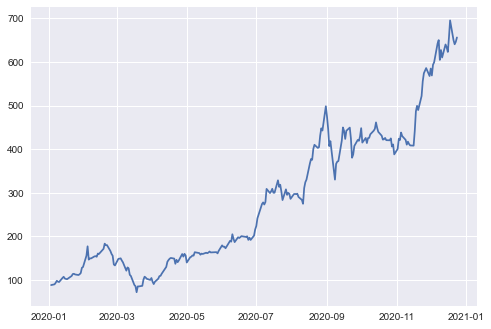

In [54]:
plt.plot(df2.Close)

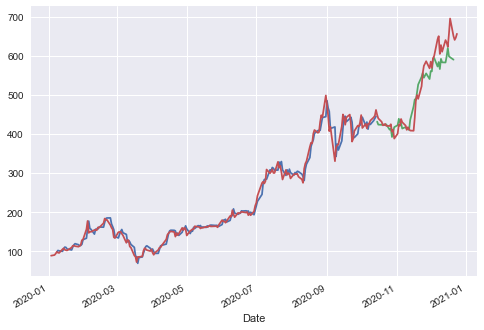

In [76]:
pd.Series(train_predict[:, 0], index=df2.index[n:split]).plot()
pd.Series(test_predict[:, 0], index=df2.index[split:-3]).plot()
plt.plot(df2.Close)
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error

In [90]:
len(Xtrain[:,0,0].tolist())

195

In [98]:
train_score = mean_squared_error(Xtrain[:,0,0].tolist(), train_predict[:, 0], squared=False)
print("Train Score: %.2f RMSE" % train_score)

test_score = mean_squared_error(Xtest[:,0,0].tolist(), test_predict[:, 0], squared=False)
print("Test Score: %.2f RMSE" % test_score)

Train Score: 256.64 RMSE
Test Score: 499.50 RMSE


In [91]:
Xtrain[:,0,0].shape

(195,)

In [93]:
train_predict

array([[ 9.77870499e+01, -2.36517918e-01],
       [ 1.02006792e+02, -2.36517918e-01],
       [ 1.01037263e+02, -2.36517918e-01],
       [ 9.97922913e+01, -2.36517918e-01],
       [ 1.05846234e+02, -2.36517918e-01],
       [ 1.10537854e+02, -2.36517918e-01],
       [ 1.09821306e+02, -2.36517918e-01],
       [ 1.05677990e+02, -2.36517918e-01],
       [ 1.03238535e+02, -2.36517918e-01],
       [ 1.10723733e+02, -2.36517918e-01],
       [ 1.16193267e+02, -2.36517918e-01],
       [ 1.19310830e+02, -2.36517918e-01],
       [ 1.16691777e+02, -2.36517918e-01],
       [ 1.13938576e+02, -2.36517918e-01],
       [ 1.14791606e+02, -2.36517918e-01],
       [ 1.17749529e+02, -2.36517918e-01],
       [ 1.29602625e+02, -2.36517918e-01],
       [ 1.33255186e+02, -2.36517918e-01],
       [ 1.58160275e+02, -2.36517918e-01],
       [ 1.76957710e+02, -2.36517918e-01],
       [ 1.58144147e+02, -2.36517918e-01],
       [ 1.55977280e+02, -2.36517918e-01],
       [ 1.43787959e+02, -2.36517918e-01],
       [ 1.